In [1]:
from tensorflow.keras import backend as K
K.clear_session()
!pip install rarfile
import os
import pandas as pd
import gdown
import rarfile
import shutil
from PIL import Image

#https://drive.google.com/file/d/1O0_qr4yHPDp_O36wS59mVvyYiX3c9pYk/view?usp=drive_link



url = 'https://drive.google.com/uc?id=1O0_qr4yHPDp_O36wS59mVvyYiX3c9pYk'
output_rar = '/content/SDR.rar'
gdown.download(url, output_rar, quiet=False)
# Extract the RAR file
with rarfile.RarFile(output_rar, 'r') as rar_ref:
    rar_ref.extractall('/content')
# Path to the extracted dataset folder
dataset_folder = '/content/SDR'

Downloading...
From (original): https://drive.google.com/uc?id=1O0_qr4yHPDp_O36wS59mVvyYiX3c9pYk
From (redirected): https://drive.google.com/uc?id=1O0_qr4yHPDp_O36wS59mVvyYiX3c9pYk&confirm=t&uuid=7c85723b-79d8-4402-a856-a59b063f1f57
To: /content/SDR.rar
100%|██████████| 231M/231M [00:05<00:00, 41.5MB/s]


## Inception V3

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, BatchNormalization, Concatenate, Input

def inception_block(x, filters):
    # 1x1 Convolution
    path1 = Conv2D(filters[0], (1, 1), activation='relu')(x)

    # 1x1 Convolution followed by 3x3 Convolution
    path2 = Conv2D(filters[1], (1, 1), activation='relu')(x)
    path2 = Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)

    # 1x1 Convolution followed by 5x5 Convolution
    path3 = Conv2D(filters[3], (1, 1), activation='relu')(x)
    path3 = Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)

    # 3x3 MaxPooling followed by 1x1 Convolution
    path4 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = Conv2D(filters[5], (1, 1), activation='relu')(path4)

    # Concatenate the output of all paths
    return Concatenate()([path1, path2, path3, path4])

def build_inception_v3(input_shape=(299, 299, 3), num_classes=5):
    inputs = Input(shape=input_shape)

    # Stem
    x = Conv2D(32, (3, 3), strides=(2, 2), activation='relu')(inputs)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    # Inception Blocks
    x = inception_block(x, filters=[64, 128, 128, 128, 256, 256])
    x = inception_block(x, filters=[128, 192, 192, 192, 384, 384])
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    # Add more inception blocks as per the original Inception V3 architecture

    # Final layers
    x = AveragePooling2D((8, 8))(x)
    x = Flatten()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = tf.keras.models.Model(inputs=inputs, outputs=x, name='inception_v3')

    return model

# Create the Inception V3 model
inception_v3_model = build_inception_v3(input_shape=(224, 224, 3))

# Show model summary
inception_v3_model.summary()
model=inception_v3_model

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_135 (Conv2D) │ (None, 111, 111,  │        896 │ input_layer_7[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_136 (Conv2D) │ (None, 109, 109,  │      9,248 │ conv2d_135[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_137 (Conv2D) │ (None, 109, 109,  │     18,496 │ conv2d_136[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 54, 54,    │          0 │ conv2d_137[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_139 (Conv2D) │ (None, 54, 54,    │      8,320 │ max_pooling2d_12… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_141 (Conv2D) │ (None, 54, 54,    │      8,320 │ max_pooling2d_12… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_13    │ (None, 54, 54,    │          0 │ max_pooling2d_12… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_138 (Conv2D) │ (None, 54, 54,    │      4,160 │ max_pooling2d_12… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_140 (Conv2D) │ (None, 54, 54,    │    147,584 │ conv2d_139[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_142 (Conv2D) │ (None, 54, 54,    │    819,456 │ conv2d_141[0][0]  │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_143 (Conv2D) │ (None, 54, 54,    │     16,640 │ max_pooling2d_13… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 54, 54,    │          0 │ conv2d_138[0][0], │
│ (Concatenate)       │ 704)              │            │ conv2d_140[0][0], │
│                     │                   │            │ conv2d_142[0][0], │
│                     │                   │            │ conv2d_143[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_145 (Conv2D) │ (None, 54, 54,    │    135,360 │ concatenate[0][0] │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_147 (Conv2D) │ (None, 54, 54,    │    135,360 │ concatenate[0][0] │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_14    │ (None, 54, 54,    │          0 │ concatenate[0][0] │
│ (MaxPooling2D)      │ 704)              │            │                 

 Total params: 3,889,317 (14.84 MB)

 Trainable params: 3,889,317 (14.84 MB)

 Non-trainable params: 0 (0.00 B)

# **Fold#1** Train Inception V3

Found 2674 images belonging to 3 classes.
Found 666 images belonging to 3 classes.
Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.6510 - loss: 0.8057
Epoch 1: val_accuracy improved from -inf to 0.76276, saving model to /content/Split/Save/best_model.keras
84/84 ━━━━━━━━━━━━━━━━━━━━ 15s 147ms/step - accuracy: 0.6516 - loss: 0.8045 - val_accuracy: 0.7628 - val_loss: 0.6197
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.7495 - loss: 0.6416
Epoch 2: val_accuracy improved from 0.76276 to 0.77477, saving model to /content/Split/Save/best_model.keras
84/84 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.7496 - loss: 0.6415 - val_accuracy: 0.7748 - val_loss: 0.5596
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.7440 - loss: 0.6153
Epoch 3: val_accuracy improved from 0.77477 to 0.77778, saving model to /content/Split/Save/best_model.keras
84/84 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.7441 - loss: 0.6152 - val_accuracy: 0.7778 - 

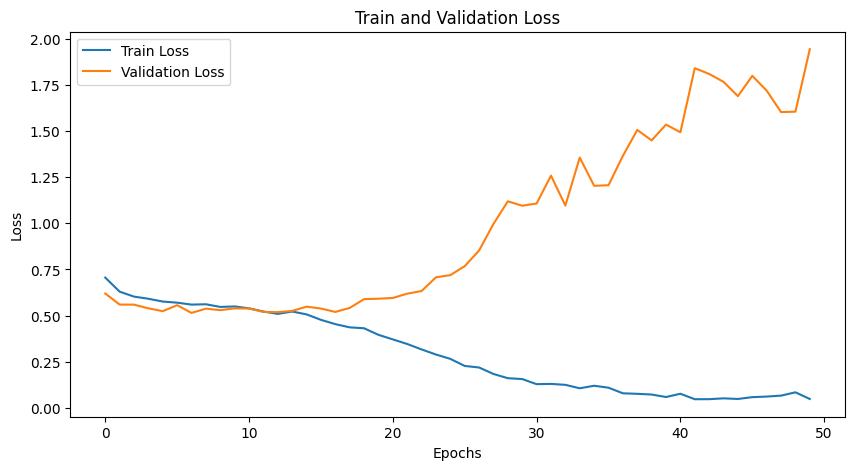

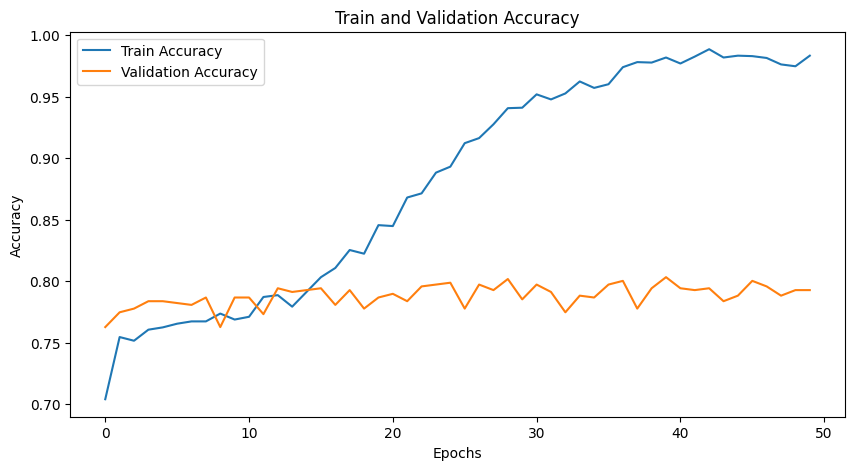

In [16]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up paths and parameters
data_dir = '/content/Gradding 3C/Train'  # Path to your dataset
img_size = (224, 224)
batch_size = 32
epochs = 50

# Create ImageDataGenerator for training and validation with rescaling
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training data generator
train_data_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

# Validation data generator
validation_data_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='validation'
)

# Define the CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 2 classes for DR and NDR
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the ModelCheckpoint callback to save the best weights
best_weights_path = '/content/Split/Save/best_model.keras'
os.makedirs(os.path.dirname(best_weights_path), exist_ok=True)  # Create directory if it does not exist
checkpoint = ModelCheckpoint(best_weights_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Train the model
history = model.fit(
    train_data_generator,
    epochs=epochs,
    validation_data=validation_data_generator,
    verbose=1,
    callbacks=[checkpoint]
)

# Plot train and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Validation Loss')
plt.show()

# Plot train and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train and Validation Accuracy')
plt.show()


# **Fold#1** Test Inception V3

In [17]:
import os
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved best weights
best_weights_path = '/content/Split/Save/best_model.keras'
model.load_weights(best_weights_path)

# Define the dataset directory
TestSet = '/content/Gradding 3C/Test'

# Create an ImageDataGenerator for test data
datagen = ImageDataGenerator(rescale=1.0/255)  # You can add other preprocessing steps here

test_data_generator = datagen.flow_from_directory(
    TestSet,
    target_size=img_size,  # Set your target image size (e.g., (224, 224))
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Do not shuffle the test data
)

# Get true labels and predicted labels
y_true = test_data_generator.classes
y_pred = np.argmax(model.predict(test_data_generator), axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1-score:", f1)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Found 838 images belonging to 3 classes.
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step
Test Accuracy: 0.7804295942720764
Test Precision: 0.7773794177249602
Test Recall: 0.7804295942720764
Test F1-score: 0.7760808174940158
Confusion Matrix:
[[351  34  10]
 [ 21 253  39]
 [  7  73  50]]
